![tinhatben](tinhatben_svg.png)


# Linear Regression

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

In [1]:
# Imports
from tinhatbenbranding import TINHATBEN_GRAY, TINHATBEN_YELLOW, add_tinhatbendotcom
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

Let's say we completed a survey of university students to determine the total amount of sleep lost for each year of study at uni.

_Note: this data is completely fictional_

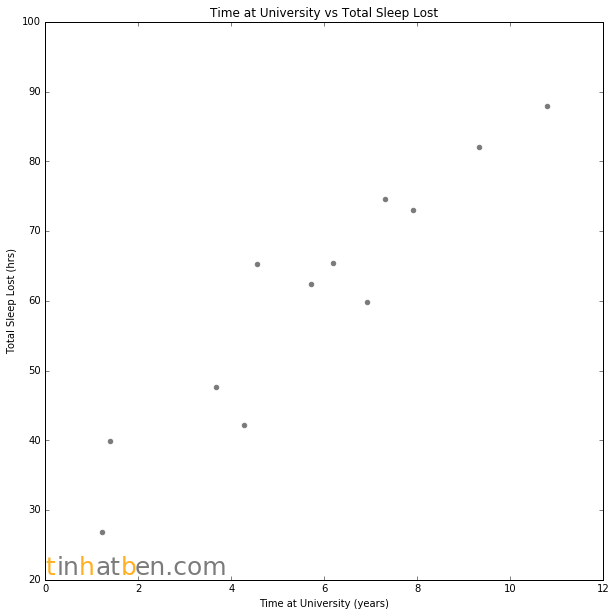

In [2]:
import scipy.io as sio
X = np.array([
        [1.21, 26.79],
        [1.4, 39.84],
        [3.66, 47.61],
        [4.27, 42.23],
        [5.72, 62.39],
        [4.56, 65.32],
        [6.19, 65.43],
        [6.92, 59.81],
        [7.3, 74.58],
        [7.9, 72.97],
        [9.32, 82.12],
        [10.79, 87.96],
    ])
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(x=X[:,0], y=X[:,1], c=TINHATBEN_GRAY, edgecolors=TINHATBEN_GRAY)
ax.set_title("Time at University vs Total Sleep Lost")
ax.set_xlabel("Time at University (years)")
ax.set_ylabel("Total Sleep Lost (hrs)")
add_tinhatbendotcom(ax, (0,0))

## Cost Function & Gradient Descent
We can write the equation of a straight line as being parameterized by weights from a learning algorithm.  The following equation defines a hypothesis (a guess at the line fit) and somewhat resembles the equation of a straight line:

$$\large{h(x^{(i)}) = \theta_0 + \theta_1x_1} $$

We can simplify the hypothesis by allowing $$\large{x_0 = 1}$$

$$
\begin{align}
\large{h(x^{(i)})} & \large{= \theta_0x_0 + \theta_1x_1} \\
& \large{= \sum_{i=0}^n\theta^Tx}
\end{align}$$

Now using the **ordinary least squares** of error estimation we define a cost function for the hypothesis; a function which describes the error between the hypothesis and the observed values.

$$\large{J(\theta) = \frac{1}{2}\sum_{i=0}^n(h(x^{(i)}) - y^{(i)})^2 }$$

### Batch Gradient Descent
Starting with some initial value of the weights of the model ($\theta$) compute the current error between the hypothesis and the observed data.  Take a small step down the slope of the cost function and re-adjust the current estimate for $\theta$.  The algorithm for batch gradient descent is defined as:

$$\large{ \theta_j := \theta_j - \left(\frac{\alpha}{n}\right) \frac{d}{d\theta_j}J(\theta) }$$

Where:
$$\large{ \frac{d}{d\theta_j} = \sum_{i=0}^n(h(x^{(i)}) - y^{(i)})x^{(i)}} \text{ and; }$$

$\large{\alpha}$ is the learning rate

The learning rate is the size of the step taken down the cost function, if the learning rate is very low the algorithm could take a long time to converge, while if it is too high the algorithm may not converge as it steps over the local minima.  It is called batch gradient descent because at each step the operation is applied to all values.

In [3]:
# Define the hypothesis function
def h_x(theta, x):
    """Compute the hypothesis of a linear regression function given:
    theta: the weights of the model as a numpy array vector
    x:     the input values for the model as a numpy array
    
    returns h_x(theta) = sum(theta * x)
    """
    return np.sum(np.dot(theta.T, x.T), axis=0)

# Define the cost function
def J(theta, x, y):
    """Compute the linear regression cost function given:
    theta: the weights of the model as a numpy array vector
    x:     the input values for the model as a numpy array
    y:     the observed response for the system as a numpy array
    
    returns J(theta) = 0.5 * sum(h_x(theta) - y)^2    
    
    """
    return np.sum((h_x(theta, x) - y) ** 2) * 0.5

# Define d/dtheta_j
def d_d_theta_J(theta, x, y):
    """Compute the partial derivative of the cost function:
    theta: the weights of the model as a numpy array vector
    x:     the input values for the model as a numpy array
    y:     the observed response for the system as a numpy array
    
    returns d_d_theta_J = sum( (h_x(theta, x) - y)x )
    """
    return (h_x(theta, x) - y).dot(x)

# Define gradient descent
def gradient_descent(theta, x, y, alpha, convergence_lim = 0.01, iteration_lim = 1500):
    """ Execute batch gradient descent 
    theta:                  the weights of the model as a numpy array vector
    x:                      the input values for the model as a numpy array
    y:                      the observed response for the system as a numpy array
    alpha:                  the learning rate for gradient descent
    convergence_lim = 0.01: convergence is declared once the difference in theta 
                            values on each iteration is within this value.  If set 
                            to < 0 convergence is not tested to complete gradient descent,
                            the iteration limit is used instead.
    iteration_lim = 1500:   The maximum number of iterations to complete if convergence is 
                            not declared earlier.
                            
    returns (theta, J_log, iteration_counter) as a tuple
    
    theta:                  the weights of the model as found by gradient descent
    J_log                   the cost function value for each set of weights tested during gradient descent
    iteration_counter:      the number of iterations executed during gradient descent
    """
    
    assert len(x) == len(y), "X and y must have the same length"
    
    tol = 1 + convergence_lim # Store the current convergence tolerance
    J_log = [] # Store a log of all the cost function results for later review
    new_theta = np.copy(theta) # Copy theta for later use
    
    prev_theta = np.copy(theta) # Initialise the previous theta values for later comparison
    n = len(x) # The number of samples
    
    iteration_counter = 0
    
    while ( (tol > convergence_lim) or (convergence_lim < 0)):
        
        # Calculate the updated value of theta
        new_theta -= ((alpha / n) * d_d_theta_J(new_theta, x, y)).reshape(theta.shape)
        
        # Compute the cost function for the new theta and store
        J_log.append(J(new_theta, x, y))
        
        # Determine if new_theta has converged
        tol =  (np.sqrt(np.sum((new_theta - prev_theta) ** 2)))
            
        if iteration_counter > iteration_lim:
            break
            
        prev_theta = np.copy(new_theta)
        iteration_counter += 1
        
    return (new_theta, J_log, iteration_counter)

In [4]:
# Construct some initial values of theta
theta = np.zeros((2,1))

# Insert x_0 = 1 into the array to calculate the hypothesis
x = np.ones((X.shape))
x[:,1] = X[:,0]
y = np.copy(X[:,1])

# Set an initial learning rate
alpha = 0.01

#Execute gradient descent
theta, J_log, iter_counter = gradient_descent(theta, x, y, alpha)
print("Theta found via gradient descent:\n%s" % theta.__str__())

linear_function_error = J(theta, x, y)

Theta found via gradient descent:
[[ 21.2277094 ]
 [  6.65028129]]


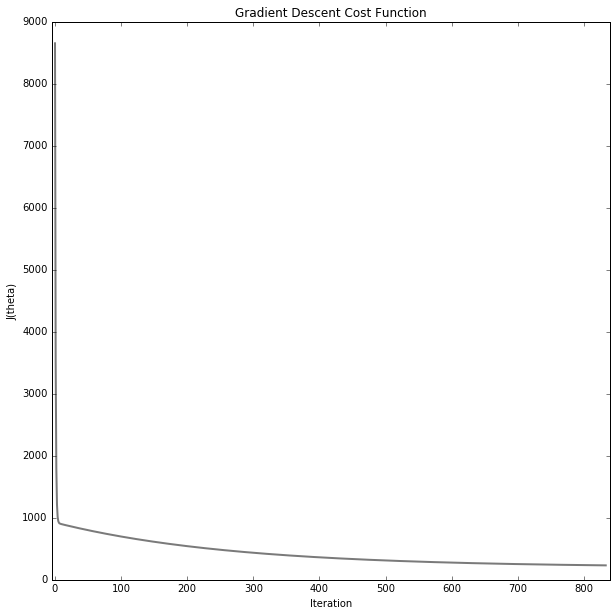

In [5]:
# Plot the cost function and observe to confirm minimisation
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(J_log, c=TINHATBEN_GRAY, linewidth=2)
ax.set_xlim([-5, iter_counter + 5])
ax.set_xlabel('Iteration')
ax.set_ylabel('J(theta)')
ax.set_title('Gradient Descent Cost Function')

Notice that in the above plot of the cost function over gradient descent we can see that the cost function aymptotes, approaching a minimum value.  This provides some evidence of a successful fit.  Let's now overlay the model with the data to observe the fit.

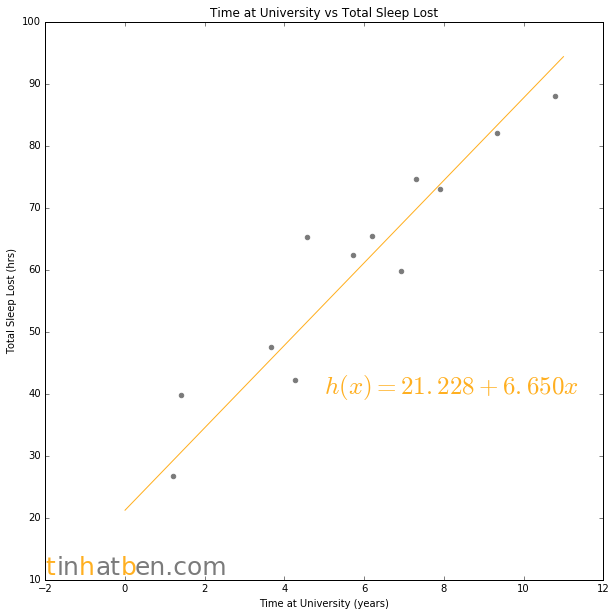

In [6]:
# Compute the new hypothesis
x_displ = np.ones((x.shape))
x_displ[:,1] = np.arange(x.shape[0])

h = h_x(theta, x_displ)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(x=X[:,0], y=X[:,1], c=TINHATBEN_GRAY, edgecolors=TINHATBEN_GRAY)
ax.plot(x_displ[:,1], h, c=TINHATBEN_YELLOW)
ax.text(5, 40, r'$h(x)'+ " = %0.3f + %0.3fx$" % (theta[0], theta[1]), fontsize=25, color=TINHATBEN_YELLOW)
ax.set_title("Time at University vs Total Sleep Lost")
ax.set_xlabel("Time at University (years)")
ax.set_ylabel("Total Sleep Lost (hrs)")
add_tinhatbendotcom(ax, (0,0))
plt.savefig("model.png", dpi=300)

What happens if we increase the learning rate to say 0.025 and 0.075?

Theta found via gradient descent:
[[ 26.48275432]
 [  5.90998899]]


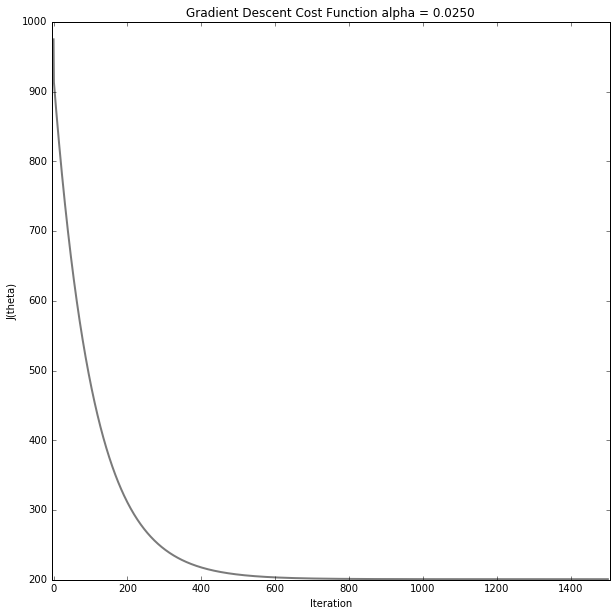

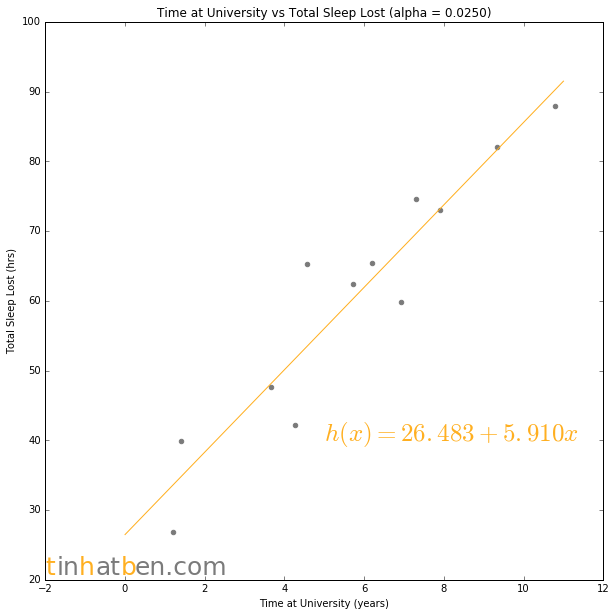

In [7]:
# Construct some initial values of theta
theta = np.zeros((2,1))

# Set an initial learning rate
alpha = 0.025

#Execute gradient descent
theta, J_log, iter_counter = gradient_descent(theta, x, y, alpha, -1)
print("Theta found via gradient descent:\n%s" % theta.__str__())

# Plot the cost function and observe to confirm minimisation
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(J_log, c=TINHATBEN_GRAY, linewidth=2)
ax.set_xlim([-5, iter_counter + 5])
ax.set_xlabel('Iteration')
ax.set_ylabel('J(theta)')
ax.set_title('Gradient Descent Cost Function alpha = %0.4f' % alpha)

h = h_x(theta, x_displ)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(x=X[:,0], y=X[:,1], c=TINHATBEN_GRAY, edgecolors=TINHATBEN_GRAY)
ax.plot(x_displ[:,1], h, c=TINHATBEN_YELLOW)
ax.text(5, 40, r'$h(x)'+ " = %0.3f + %0.3fx$" % (theta[0], theta[1]), fontsize=25, color=TINHATBEN_YELLOW)
ax.set_title("Time at University vs Total Sleep Lost (alpha = %0.4f)" % alpha)
ax.set_xlabel("Time at University (years)")
ax.set_ylabel("Total Sleep Lost (hrs)")
add_tinhatbendotcom(ax, (0,0))

Look at the number of iterations it takes for $J(\theta)$ to asymptote, convergence is taking longer with a larger learning rate

In [8]:
# Construct some initial values of theta
theta = np.zeros((2,1))

# Set an initial learning rate
alpha = 0.075

#Execute gradient descent
theta, J_log, iter_counter = gradient_descent(theta, x, y, alpha, -1)
print("Theta found via gradient descent:\n%s" % theta.__str__())

Theta found via gradient descent:
[[ nan]
 [ nan]]


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:21: RuntimeWarning: overflow encountered in square
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:75: RuntimeWarning: overflow encountered in square
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:69: RuntimeWarning: invalid value encountered in subtract


This example does not converge, the learning rate is too high.

## Stochastic Gradient Descent
We mentioned above during batch gradient descent all of the input variables are treated simultaneously.  With a lot of training data this may be very slow of may not be possible due to memory constraints.  Another way of executing gradient descent is to treat the values independently, iterating over each separately and computing:

$$\large{ \theta_j := \theta_j - \left(\frac{\alpha}{n}\right) \frac{d}{d\theta_j}J(\theta) }$$

Where:
$$\large{ \frac{d}{d\theta_j} = (h(x^{(i)}) - y^{(i)})x^{(i)}} \text{ and; }$$

$\large{\alpha}$ is the learning rate

In this example, there is little benefit to completing stochastic gradient descent over batch as the data set is so small.

In [9]:
# Define gradient descent
def stochastic_gradient_descent(theta, x, y, alpha, convergence_lim = 0.01, iteration_lim = 1500):
    """ Execute stochastic gradient descent 
    theta:                  the weights of the model as a numpy array vector
    x:                      the input values for the model as a numpy array
    y:                      the observed response for the system as a numpy array
    alpha:                  the learning rate for gradient descent
    convergence_lim = 0.01: convergence is declared once the difference in theta 
                            values on each iteration is within this value.  If set 
                            to < 0 convergence is not tested to complete gradient descent,
                            the iteration limit is used instead.
    iteration_lim = 1500:   The maximum number of iterations to complete if convergence is 
                            not declared earlier.
                            
    returns (theta, J_log, iteration_counter) as a tuple
    
    theta:                  the weights of the model as found by gradient descent
    J_log                   the cost function value for each set of weights tested during gradient descent
    iteration_counter:      the number of iterations executed during gradient descent
    """
    
    assert len(x) == len(y), "X and y must have the same length"
    
    tol = 1 + convergence_lim # Store the current convergence tolerance
    J_log = [] # Store a log of all the cost function results for later review
    new_theta = np.copy(theta) # Copy theta for later use
    
    prev_theta = np.copy(theta) # Initialise the previous theta values for later comparison
    n = len(x) # The number of samples
    
    iteration_counter = 0
    while ( (tol > convergence_lim) or (convergence_lim < 0)):
        
        # Stochastic gradient descent
        for i in range(n):
        
            # Calculate the updated value of theta
            tmp_theta = (alpha / n) * ((h_x(new_theta, x[i, :]) - y[i])*(x[i,:]))
            new_theta -= tmp_theta.reshape(theta.shape)

        # Compute the cost function for the new theta and store
        J_log.append(J(new_theta, x, y))

        # Determine if new_theta has converged
        tol =  (np.sqrt(np.sum((new_theta - prev_theta) ** 2)))

        if iteration_counter > iteration_lim:
            break

        prev_theta = np.copy(new_theta)
        iteration_counter += 1
        
    return (new_theta, J_log, iteration_counter)

In [10]:
# Execute stochastic gradient descent
# Construct some initial values of theta
theta = np.ones((2,1))
# Insert x_0 = 1 into the array to calculate the hypothesis
x = np.ones((X.shape))
x[:,1] = X[:,0]
y = np.copy(X[:,1])

# Set an initial learning rate
alpha = 0.01

#Execute gradient descent
theta, J_log, iter_counter = stochastic_gradient_descent(theta, x, y, alpha)
print("Theta found via gradient descent:\n%s" % theta.__str__())

Theta found via gradient descent:
[[ 21.38188976]
 [  6.58546528]]


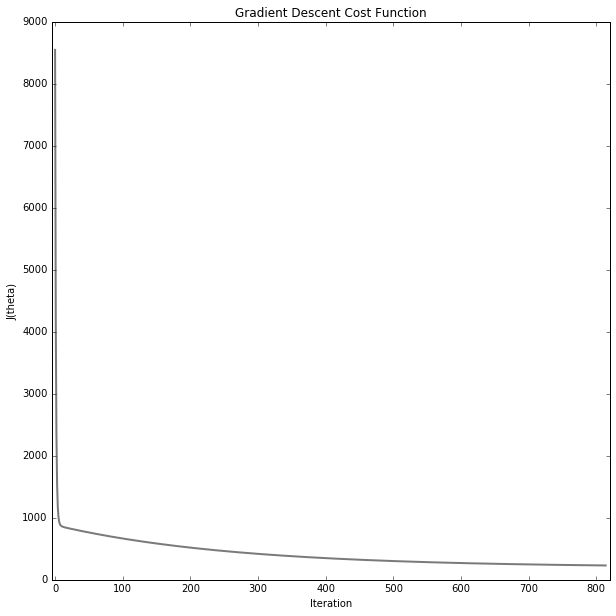

In [11]:
# Plot the cost function and observe to confirm minimisation
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(J_log, c=TINHATBEN_GRAY, linewidth=2)
ax.set_xlim([-5, iter_counter + 5])
ax.set_xlabel('Iteration')
ax.set_ylabel('J(theta)')
ax.set_title('Gradient Descent Cost Function')

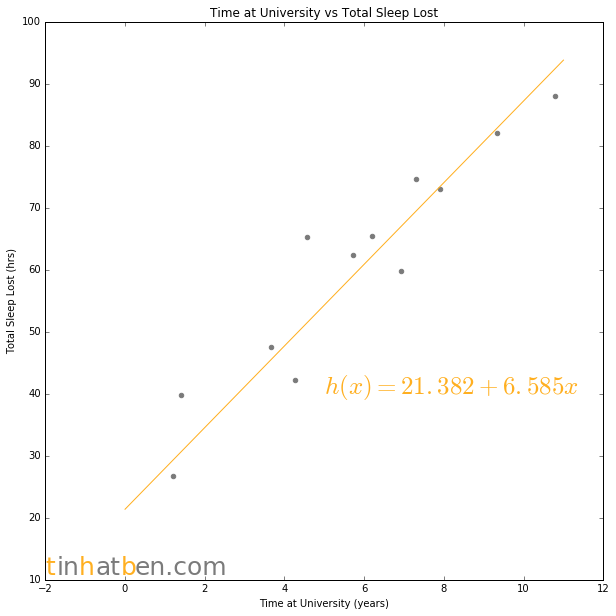

In [12]:
# Compute the new hypothesis
x_displ = np.ones((x.shape))
x_displ[:,1] = np.arange(x.shape[0])
h = h_x(theta, x_displ)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(x=X[:,0], y=X[:,1], c=TINHATBEN_GRAY, edgecolors=TINHATBEN_GRAY)
ax.plot(x_displ[:,1], h, c=TINHATBEN_YELLOW)
ax.text(5, 40, r'$h(x)'+ " = %0.3f + %0.3fx$" % (theta[0], theta[1]), fontsize=25, color=TINHATBEN_YELLOW)
ax.set_title("Time at University vs Total Sleep Lost")
ax.set_xlabel("Time at University (years)")
ax.set_ylabel("Total Sleep Lost (hrs)")
add_tinhatbendotcom(ax, (0,0))
plt.savefig("model.png", dpi=300)

Compare to the result obtained from scikit learn

In [13]:
# Create the model
regr = linear_model.LinearRegression(fit_intercept=True)

# Train the model
regr.fit(X[:,0].reshape(-1,1), X[:,1].reshape(-1,1))

# The model
print("The model")
print('h(x) = %0.3f + %0.3fx' % (regr.intercept_, regr.coef_[0]))


The model
h(x) = 26.505 + 5.907x


This is consistent with the linear model we developed

## Polynomial Fit
Say the data wasn't so linear and we had a few extra points such as the following:

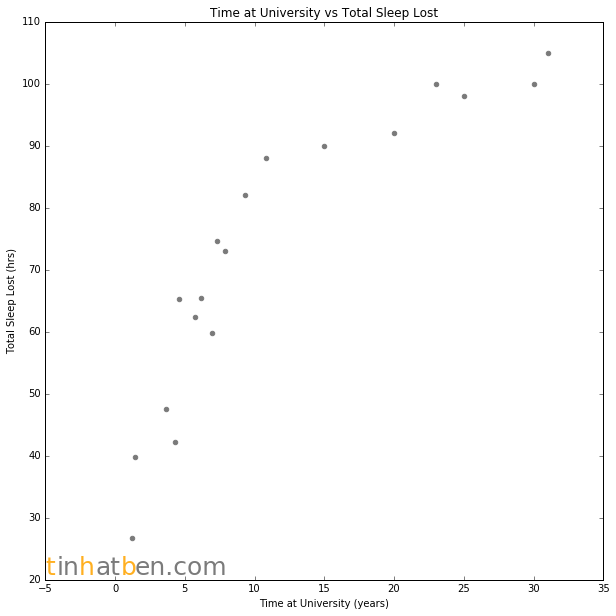

In [14]:
# Compute the new hypothesis
X = np.append(X, [[15, 90],[20, 92], [25, 98], [23, 100],[30,100],[31, 105]], axis=0)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(x=X[:,0], y=X[:,1], c=TINHATBEN_GRAY, edgecolors=TINHATBEN_GRAY)
ax.set_title("Time at University vs Total Sleep Lost")
ax.set_xlabel("Time at University (years)")
ax.set_ylabel("Total Sleep Lost (hrs)")
add_tinhatbendotcom(ax, (0,0))
plt.savefig("poly_dat.jpg", dpi=300)

Would a polynomial fit this data better?  Let's try a second order polynomial by adding an additional weight to the hypothesis:

$$\large{ h(\theta) = \theta_0x_0  + \theta_1x_1 + \theta_2x_1^2 + \theta_3x_1^3}$$

In this example we have simply taken the feature $x_1$ and added it as polynomial terms in the equation.  We could however also use other features i.e. $x_2, x_3$ etc if we had additional info for the model.

<br />

First we need to update the gradient descent and cost functions

In [15]:
def normalise_features(x):
    mn = np.mean(x, axis=0)
    stdev = np.std(x, axis=0)
    X = (x - mn) / stdev
    return X, mn, stdev

# Define cost function for the polynomial function
def J_poly(theta, x, y):
    """Compute the linear regression cost function given:
    theta: the weights of the model as a numpy array vector
    x:     the input values for the model as a numpy array
    y:     the observed response for the system as a numpy array
    
    returns J(theta) = 0.5 * sum(h_x(theta) - y)^2    
    
    """
    n = x.shape[0]
    h = h_x(theta, x)
    J = np.dot((h - y).T, (h - y)) / float(2 * n)
    #J = (1 / (2 * m)) * (h - y)' * (h - y);   
    return J

# Define gradient descent for the polynomial function
def gradient_descent_poly(theta, x, y, alpha, convergence_lim = 0.01, iteration_lim = 1500):
    """ Execute batch gradient descent 
    theta:                  the weights of the model as a numpy array vector
    x:                      the input values for the model as a numpy array
    y:                      the observed response for the system as a numpy array
    alpha:                  the learning rate for gradient descent
    convergence_lim = 0.01: convergence is declared once the difference in theta 
                            values on each iteration is within this value.  If set 
                            to < 0 convergence is not tested to complete gradient descent,
                            the iteration limit is used instead.
    iteration_lim = 1500:   The maximum number of iterations to complete if convergence is 
                            not declared earlier.
                            
    returns (theta, J_log, iteration_counter) as a tuple
    
    theta:                  the weights of the model as found by gradient descent
    J_log                   the cost function value for each set of weights tested during gradient descent
    iteration_counter:      the number of iterations executed during gradient descent
    """
    
    assert len(x) == len(y), "X and y must have the same length"
    
    tol = 1 + convergence_lim # Store the current convergence tolerance
    J_log = [] # Store a log of all the cost function results for later review
    new_theta = np.copy(theta) # Copy theta for later use
    
    prev_theta = np.copy(theta) # Initialise the previous theta values for later comparison
    n = len(x) # The number of samples
    
    iteration_counter = 0
    
    while ( (tol > convergence_lim) or (convergence_lim < 0)):
        
        # Determine the current estimate
        h = h_x(new_theta, x)
        
        # Update the values for theta
        k = ((alpha / n) * np.dot((h - y).T, x)).reshape(new_theta.shape)
        
        new_theta -= k
                           
        # Calculate the updated value of theta
        #new_theta -= ((alpha / n) * d_d_theta_J(new_theta, x, y)).reshape(theta.shape)
        
        # Compute the cost function for the new theta and store
        J_log.append(J_poly(new_theta, x, y))
        
        # Determine if new_theta has converged
        tol =  (np.sqrt(np.sum((new_theta - prev_theta) ** 2)))
            
        if iteration_counter > iteration_lim:
            break
            
        prev_theta = np.copy(new_theta)
        iteration_counter += 1
        
    return (new_theta, J_log, iteration_counter)

### Normalising the features
As we are now using more than one feature in our model $x_1, x_1^2$ and $x_1^3$ we need to normalise the features to ensure they are of the same scale.  If we didn't then the squared and cubed terms would completely dominate the model.  There are a number of different ways of normalising: for this example we are going to subtract the mean and divide by the standard deviation. 

## Building the model

In [16]:
# Construct some initial values of theta
theta = np.zeros((4,1))

# Insert x_0 = 1 into the array to calculate the hypothesis
x = np.ones((X.shape[0], X.shape[1] + 2))
x[:,1] = X[:,0]
x[:,2] = X[:,0] ** 2
x[:,3] = X[:,0] ** 3
y = np.copy(X[:,1])

x[:,1:], mn, stdev = normalise_features(x[:,1:])

# Set an initial learning rate
alpha = 0.01

#Execute gradient descent
theta, J_log, iter_counter = gradient_descent_poly(theta, x, y, alpha)
print("Theta found via gradient descent:\n%s" % theta.__str__())

polynomial_function_error = J(theta, x, y)

Theta found via gradient descent:
[[ 72.8916464 ]
 [ 28.51282928]
 [  1.02618994]
 [-11.13507311]]


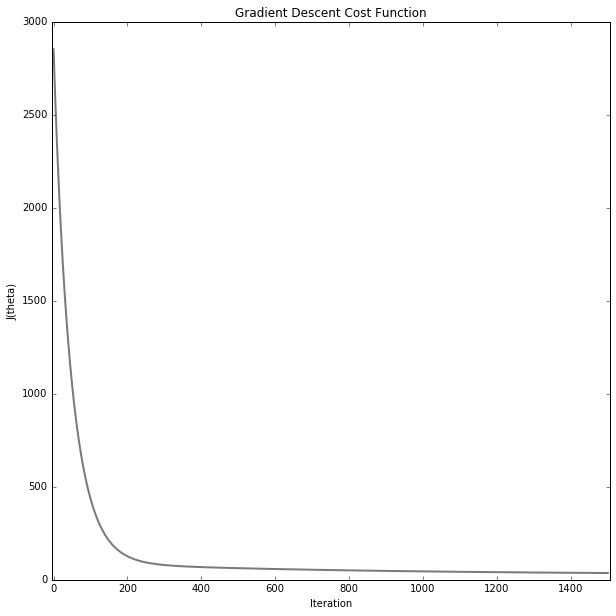

In [17]:
# Plot the cost function and observe to confirm minimisation
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(J_log, c=TINHATBEN_GRAY, linewidth=2)
ax.set_xlim([-5, iter_counter + 5])
ax.set_xlabel('Iteration')
ax.set_ylabel('J(theta)')
ax.set_title('Gradient Descent Cost Function')

## Making Predictions

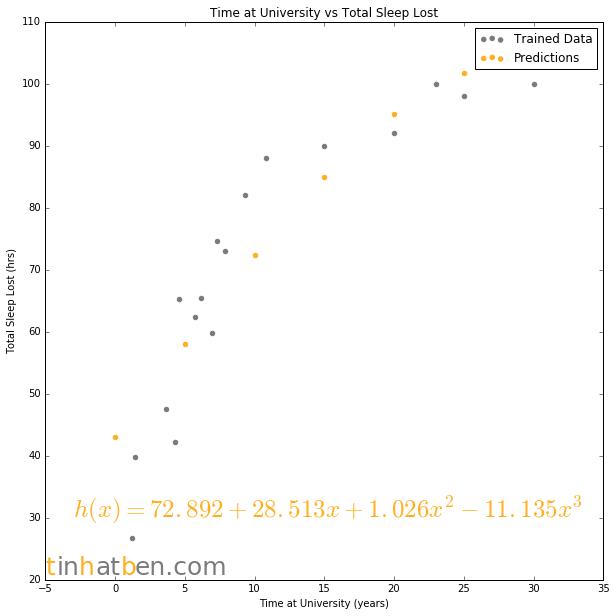

In [18]:
## Construct the values to predict
x_test = np.zeros((7, 3))
x_test[:,0] = np.linspace(0, 30, num=7)
x_test[:,1] = x_test[:,0] ** 2
x_test[:,2] = x_test[:,0] ** 3

x_adjusted = (x_test - mn) / stdev # Don't forget to normalise
x_displ = np.ones((x_test.shape[0], 4)) # Add the intercept term
x_displ[:,1:] = x_adjusted

h = h_x(theta, x_displ)


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
data_fig = ax.scatter(x=X[:,0], y=X[:,1], c=TINHATBEN_GRAY, edgecolors=TINHATBEN_GRAY)
predict_fig = ax.scatter(x_test[:,0], h, c=TINHATBEN_YELLOW, edgecolors=TINHATBEN_YELLOW)
ax.text(-3, 30, r'$h(x)'+ " = %0.3f + %0.3fx + %0.3fx^2 %0.3fx^3$" % (theta[0], theta[1], theta[2], theta[3]), 
        fontsize = 25, color=TINHATBEN_YELLOW)
ax.set_title("Time at University vs Total Sleep Lost")
ax.set_xlabel("Time at University (years)")
ax.set_ylabel("Total Sleep Lost (hrs)")
ax.legend([data_fig, predict_fig], ['Trained Data', 'Predictions'])
add_tinhatbendotcom(ax, (0,0)) 

We can see that the fitted polynomial is capable of making reasonable predictions, though the fit is worse around the $x_1 =$ 10 to 15 year mark.  We could continue to increase the complexity of the polynomial to improve the fit, though we do risk overfitting the data.  We will cover quality of fit in a later blog post.

Finally, let's compare out result with scikit learn

h(x) = 19.545 + 9.707x -0.419x^2 + 0.006x^3


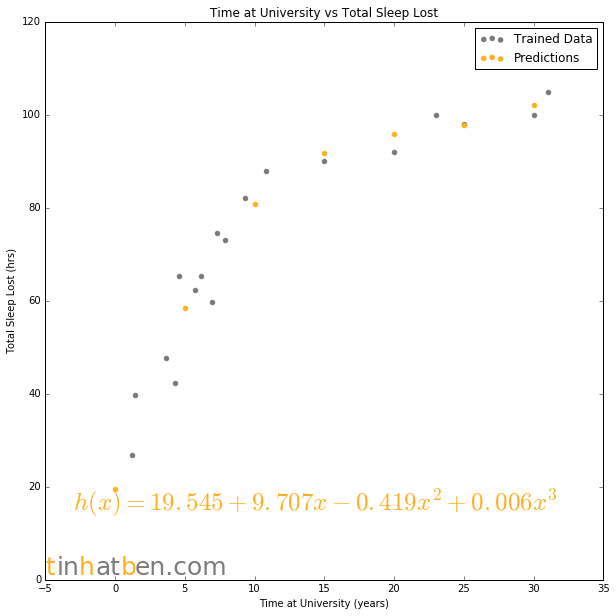

In [19]:
# Create the model
regr = linear_model.LinearRegression(fit_intercept=True, normalize=True)

x_poly = np.zeros((X.shape[0], 3))
x_poly[:,0] = X[:,0]
x_poly[:,1] = X[:,0] ** 2
x_poly[:,2] = X[:,0] **3

# Train the model
regr.fit(x_poly, X[:,1].reshape(-1,1))

h = regr.predict(x_test)

# The model
print('h(x) = %0.3f + %0.3fx %0.3fx^2 + %0.3fx^3' % 
      (regr.intercept_, regr.coef_[0][0], regr.coef_[0][1], regr.coef_[0][2]))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
data_fig = ax.scatter(x=X[:,0], y=X[:,1], c=TINHATBEN_GRAY, edgecolors=TINHATBEN_GRAY)
predict_fig = ax.scatter(x_test[:,0], h, c=TINHATBEN_YELLOW, edgecolors=TINHATBEN_YELLOW)
ax.text(-3, 15, r'$h(x)'+ " = %0.3f + %0.3fx %0.3fx^2 + %0.3fx^3$" % 
        (regr.intercept_, regr.coef_[0][0], regr.coef_[0][1], regr.coef_[0][2]),
        fontsize = 25, color=TINHATBEN_YELLOW)
ax.set_title("Time at University vs Total Sleep Lost")
ax.set_xlabel("Time at University (years)")
ax.set_ylabel("Total Sleep Lost (hrs)")
ax.legend([data_fig, predict_fig], ['Trained Data', 'Predictions'])
add_tinhatbendotcom(ax, (0,0)) 

In the polynomial example we can see that the scikit-learn model is a much better fit.  This is in part due to more advanced optimisation techniques and accounting for regularisation, which we will discuss later